# Ejemplo de computer vision para identificar numeros escritos a mano

## Importar paquestes y librerias, y dataset de ejemplo

In [1]:
from sklearn import datasets,metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

## Configurar el output para que las graficas se muestren en el cuaderno

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

## Cargar el dataset de digitos que usaremos e imprimir una muestra para entenderlo mejor

In [3]:
digits = datasets.load_digits()

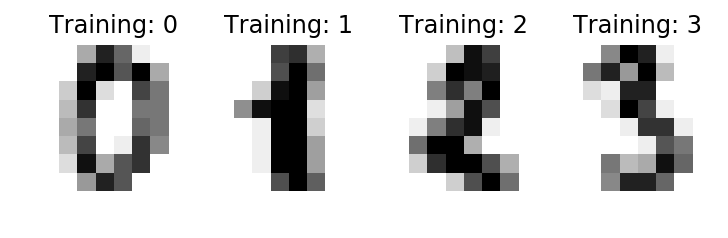

In [4]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [44]:
n_samples = len(digits.images)
vectorial_images = digits.images.reshape((n_samples, -1)) #como mencionamos, necesitamos convertir las imagenes a vectores

## Haremos machine learning utilizando logistic regression

In [37]:
logistic_reg = LogisticRegression(max_iter=1)
logistic_reg.fit(vectorial_images[:n_samples // 2], digits.target[:n_samples // 2])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
expected = digits.target[n_samples // 2:]
predicted = logistic_reg.predict(vectorial_images[n_samples // 2:])

In [39]:
print("Classification report for classifier %s:\n%s\n"
      % (logistic_reg, metrics.classification_report(expected, predicted)))


Classification report for classifier LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False):
             precision    recall  f1-score   support

          0       0.78      0.98      0.87        88
          1       0.79      0.79      0.79        91
          2       0.77      0.87      0.82        86
          3       0.43      0.88      0.58        91
          4       0.97      0.92      0.94        92
          5       0.70      0.95      0.80        91
          6       0.94      0.98      0.96        91
          7       0.81      0.99      0.89        89
          8       0.00      0.00      0.00        88
          9       0.00      0.00      0.00        92

avg / total       0.62      0.74      0.66       899




/home/luis/anaconda2/envs/TIF_data_science/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Ahora imprimiremos algunas imagenes, su valor real, y el valor que nuestro algoritmo aprendio

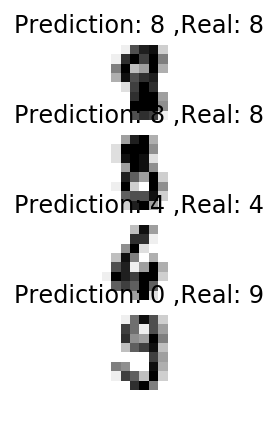

In [45]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted,expected))
for index, (image, prediction,real_value) in enumerate(images_and_predictions[:4]):
    plt.subplot(5, 1, index+1 )
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: {} ,Real: {}'.format( prediction,real_value) )

plt.show()

## Ahora haremos machine learning utilizando una red neuronal

In [41]:
neural_network = MLPClassifier(hidden_layer_sizes=(25),max_iter=1000)
neural_network.fit(vectorial_images[:n_samples // 2], digits.target[:n_samples // 2])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=25, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [42]:
predicted = neural_network.predict(vectorial_images[n_samples // 2:])

In [43]:
print("Classification report for classifier %s:\n%s\n"
      % (neural_network, metrics.classification_report(expected, predicted)))


Classification report for classifier MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=25, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False):
             precision    recall  f1-score   support

          0       0.96      0.92      0.94        88
          1       0.93      0.90      0.92        91
          2       0.99      0.97      0.98        86
          3       0.89      0.82      0.86        91
          4       0.97      0.91      0.94        92
          5       0.78      0.93      0.85        91
          6       0.93      0.99      0.96        91
          7       0.98      0.90      0.94        89
          8       0.84      0.83      0.83        88


## Este es un ejemplo muy sencillo, con un dataset muy pequeño y sencillo, en aplicaciones reales , necesitariamos usar una red convolucional, y datasets mas grandes y variados 